### countplot: Seaborn

In [4]:
import seaborn as sns

In [5]:
diamonds = sns.load_dataset("diamonds")

diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
diamonds.shape

(53940, 10)

In [7]:
diamonds = diamonds[diamonds.clarity.isin(["SI1", "VS2"])]

diamonds.shape

(25323, 10)

### Basics

In [10]:
sns.set_style("darkgrid")

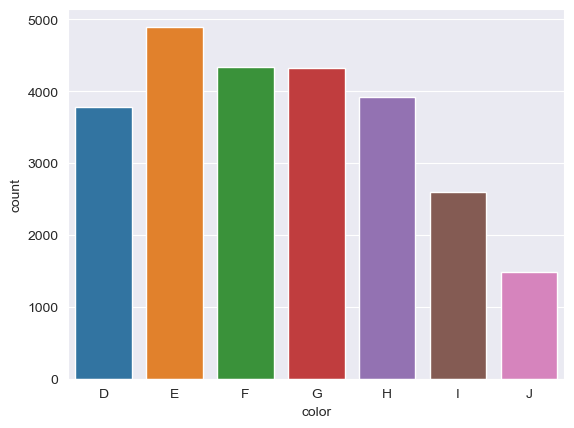

In [12]:
sns.countplot(x="color", data=diamonds);

### Horizontal counplot

<Axes: xlabel='count', ylabel='color'>

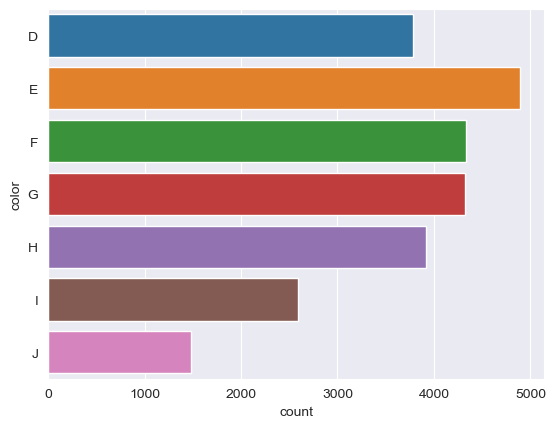

In [13]:
sns.countplot(y="color", data=diamonds)

### Options

#### order

<Axes: xlabel='color', ylabel='count'>

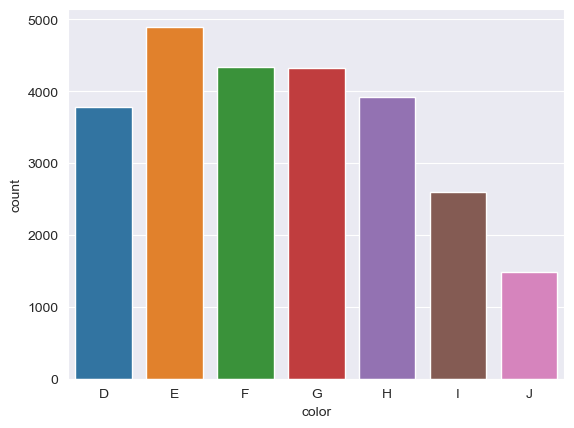

In [15]:
sns.countplot(x="color", data=diamonds)

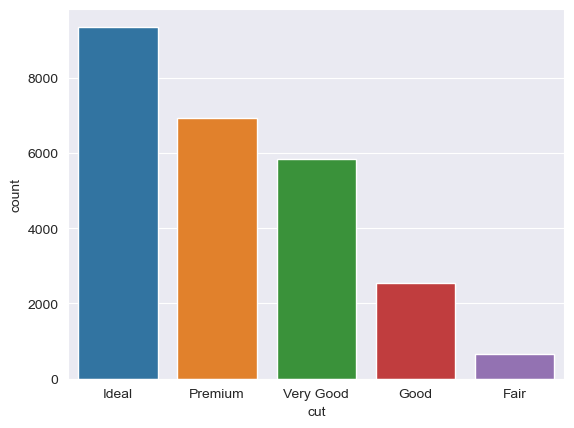

In [16]:
sns.countplot(x="cut", data=diamonds);

In [23]:
diamonds.color.cat.categories

Index(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype='object')

In [24]:
diamonds.cut.cat.categories

Index(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype='object')

<Axes: xlabel='color', ylabel='count'>

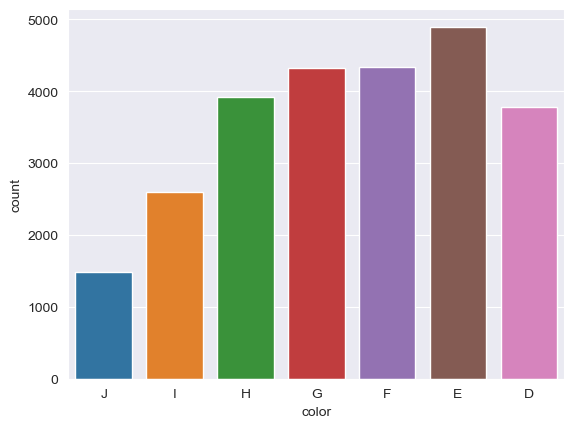

In [21]:
color_order = ["J", "I", "H", "G", "F", "E", "D"]

sns.countplot(x="color", data=diamonds, order=color_order)

### Order Ascending or Descending

In [27]:
diamonds.color.value_counts().index

CategoricalIndex(['E', 'F', 'G', 'H', 'D', 'I', 'J'], categories=['D', 'E', 'F', 'G', 'H', 'I', 'J'], ordered=False, dtype='category', name='color')

<Axes: xlabel='color', ylabel='count'>

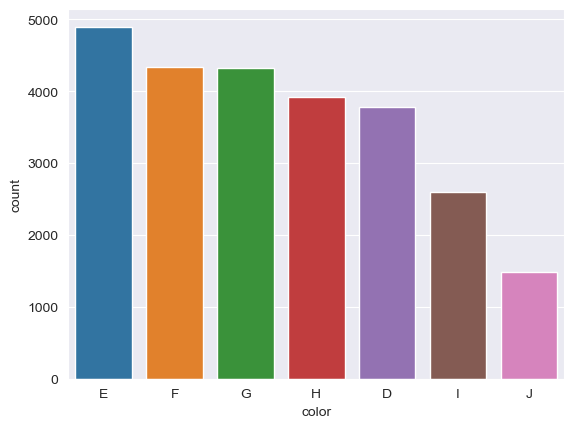

In [29]:
sns.countplot(x="color", data=diamonds,
             order=diamonds.color.value_counts().index)

<Axes: xlabel='color', ylabel='count'>

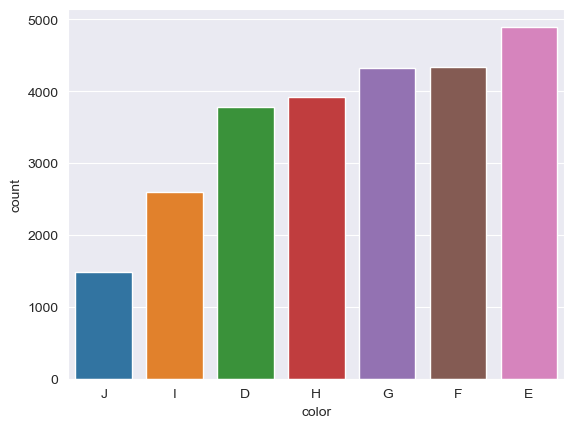

In [34]:
sns.countplot(x="color", data=diamonds,
            order=diamonds.color.value_counts().index[::-1])

### hue, hue_order

<Axes: xlabel='color', ylabel='count'>

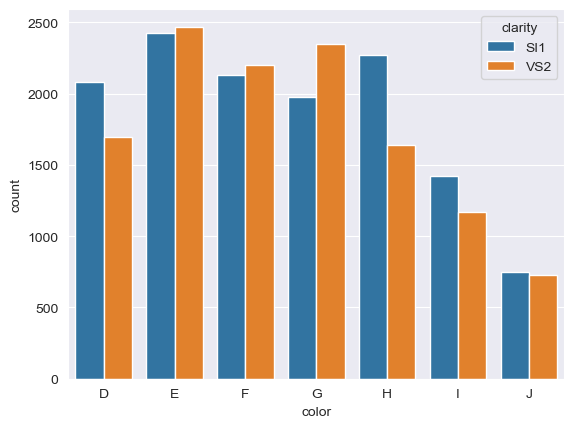

In [36]:
sns.countplot(x="color", data=diamonds,
             hue="clarity",
             hue_order=["SI1", "VS2"])

### Second Method

In [41]:
import pandas as pd

diamonds["clarity_cat"] = pd.Categorical(diamonds["clarity"], categories=["SI1", "VS2"])
diamonds["clarity_cat"]

# import pandas as pd

# pd.Categorical(diamonds["clarity"], categories=["SI1", "VS2"])


1        SI1
3        VS2
7        SI1
8        VS2
10       SI1
        ... 
53933    VS2
53934    SI1
53935    SI1
53936    SI1
53937    SI1
Name: clarity_cat, Length: 25323, dtype: category
Categories (2, object): ['SI1', 'VS2']

<Axes: xlabel='color', ylabel='count'>

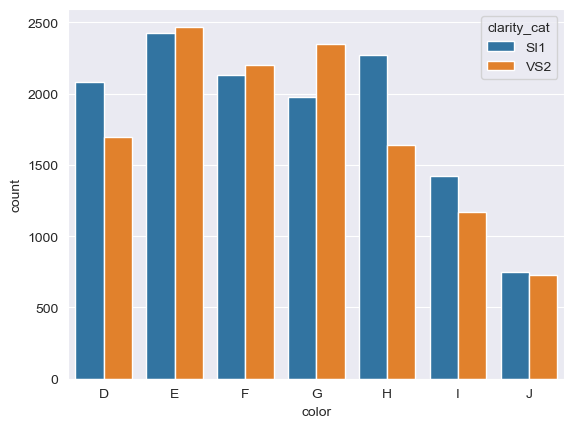

In [43]:
sns.countplot(x="color", data=diamonds,
            hue="clarity_cat")

### Styling

### color and palette

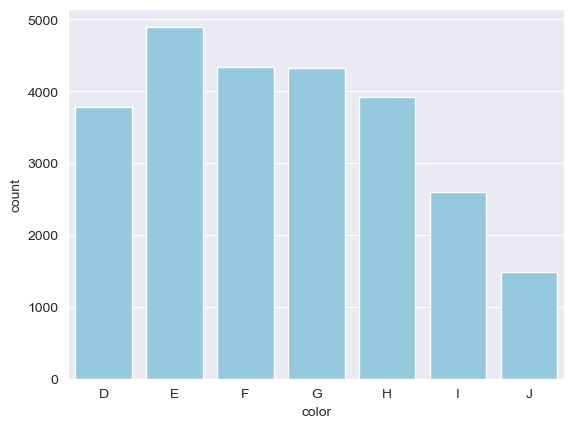

In [45]:
sns.countplot(x="color", data=diamonds,
             color="skyblue");

<Axes: xlabel='color', ylabel='count'>

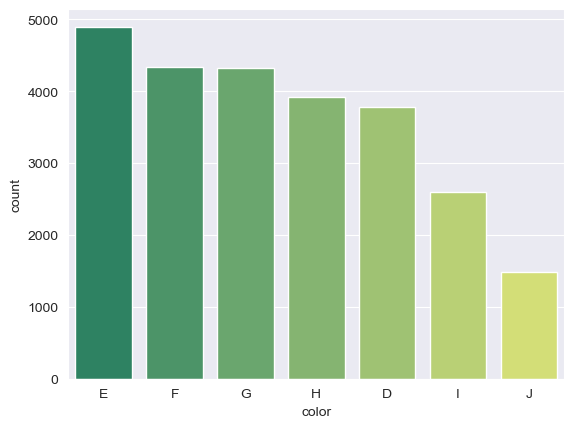

In [53]:
sns.countplot(x="color", data=diamonds,
              order=diamonds.color.value_counts().index,
             palette="summer")

### Other Matplotlib Properties

<Axes: xlabel='color', ylabel='count'>

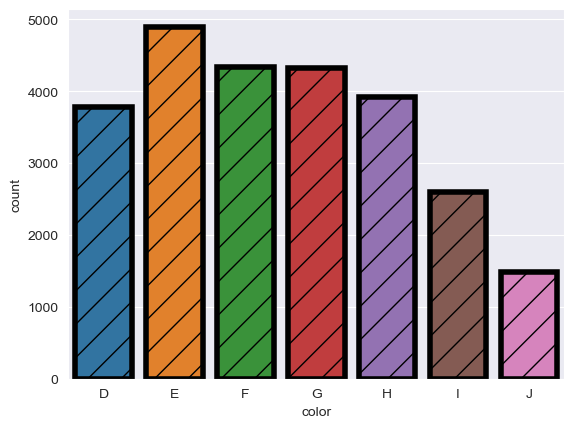

In [55]:
sns.countplot(x="color", data=diamonds,
             lw=4, 
             ec="black", hatch="/")

### Examples Thumbnails

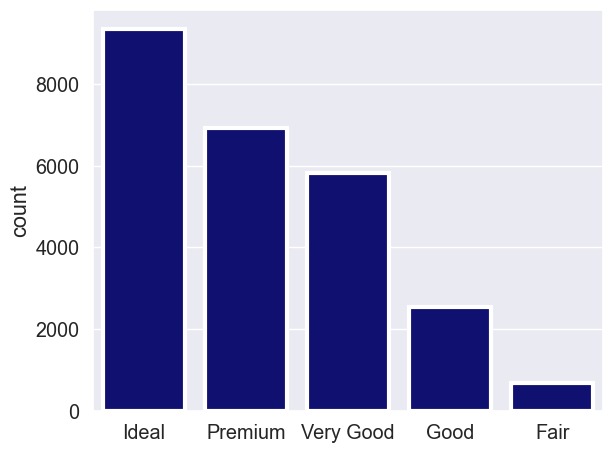

In [61]:
sns.set(style="darkgrid", font_scale=1.3)
sns.countplot(x="cut", data=diamonds, color="navy", lw=3)
plt.xlabel("")
plt.ylabel("count")

plt.tight_layout()
#plt.savefig("20countplot_image_countplotExample.png", dpi=200)

In [63]:
sns.set_style("white")

df = pd.DataFrame({"Animal" : ["dog", "cat", "cat", "dog", "dog", "cat", "dog"],
                 "Weight" :[55, 8, 12, 25, 100, 10, 60]
                  })

In [64]:
df

,Animal,Weight
0,dog,55
1,cat,8
2,cat,12
3,dog,25
4,dog,100
5,cat,10
6,dog,60


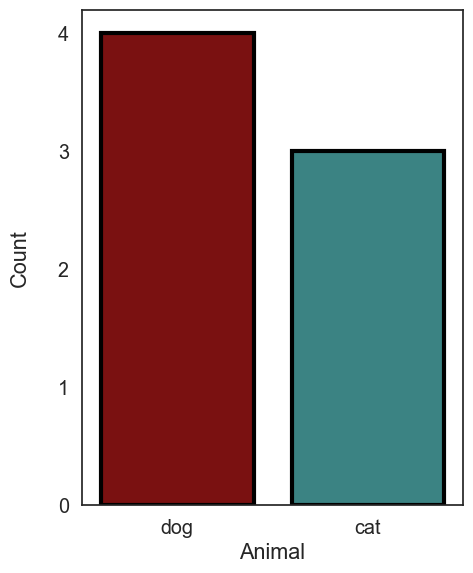

In [68]:
plt.figure(figsize=(5,6))

sns.countplot(x='Animal', data=df, ec='black', lw=3, palette=['darkred', '#2F8F8F'])

plt.yticks([0, 1, 2, 3, 4])
plt.ylabel("Count", labelpad=20)

plt.tight_layout()
# plt.savefig("21countplot_figure_dogsCats.svg")

In [69]:
df.groupby("Animal").Weight.mean()

Animal
cat    10.0
dog    60.0
Name: Weight, dtype: float64

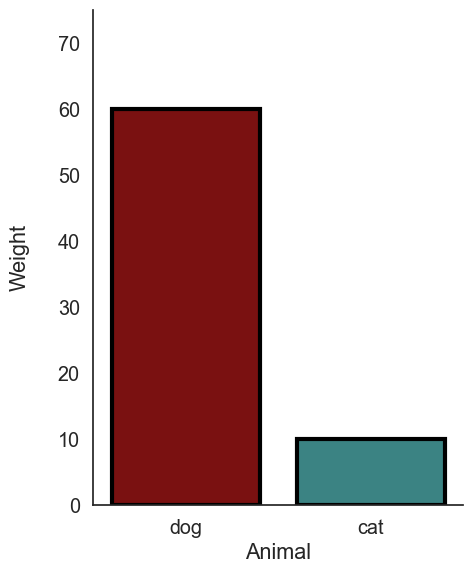

In [74]:
plt.figure(figsize=(5,6))

sns.barplot(x="Animal", y="Weight", data=df,
           ec="black",
           lw=3,
           palette=["darkred", "#2F8F8F"],
           errorbar=None
           )
plt.ylim(0, 75)
plt.ylabel("Weight", labelpad=20)

sns.despine()

plt.tight_layout()
#plt.savefig("21countplot_figure_bar_noCI.svg")






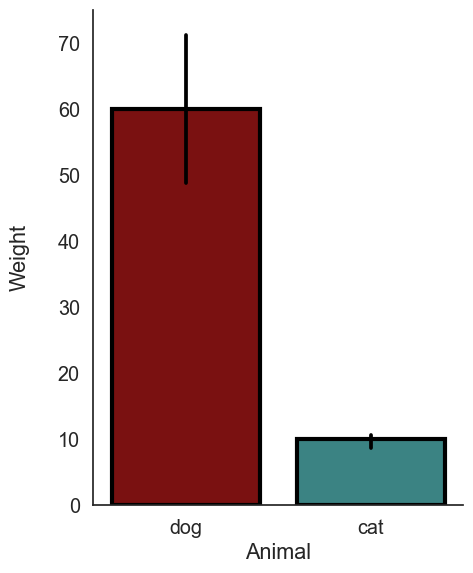

In [77]:
plt.figure(figsize=(5,6))

sns.barplot(x="Animal", y="Weight", data=df, 
           ec="black", lw=3,
           palette=["darkred", "#2F8F8F"],
           errorbar=("ci", 68),
           errcolor="black"
           )

plt.ylim(0, 75)
plt.ylabel("Weight", labelpad=20)

sns.despine()

plt.tight_layout()
# plt.savefig("21countplot_figure_dogsCats_bar_withCI.svg")

### Thumb

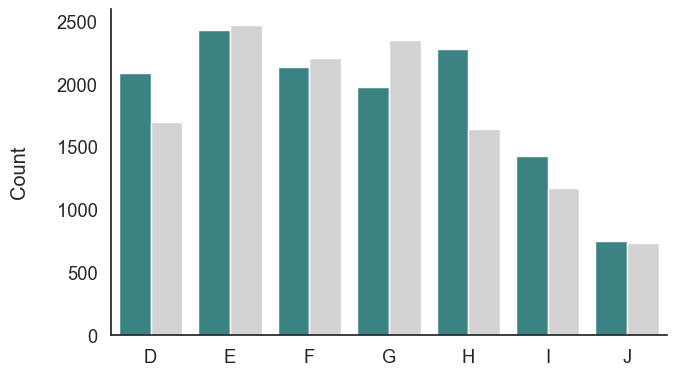

In [78]:
plt.figure(figsize=(7, 4))
sns.set(style="white", font_scale=1.2)
ax=sns.countplot(x="color", data=diamonds,
                hue="clarity", hue_order=["SI1", "VS2"],
                palette=["#2F8F8F", "lightgray"])
ax.legend([], frameon=False)
sns.despine()

plt.xlabel("")
plt.ylabel("Count", labelpad=20)
plt.tight_layout()
#plt.savefig("21countplot_image_thumb.png", dpi=200);